# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from code.bootstrap_routines import *


%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Mini_Projects/EDA_Racial_Discrimination/data/us_job_market_discrimination.dta')




In [4]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [15]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [3]:
w = data[data.race=='w']
b = data[data.race=='b']

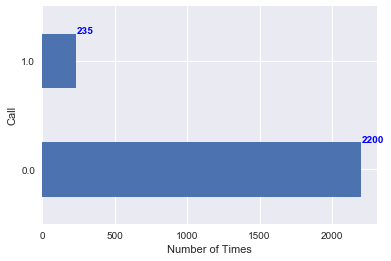

In [101]:

jb = w['call'].value_counts().plot(kind='barh')
jb.set_xlabel("Number of Times")
jb.set_ylabel("Call")

for i, v in enumerate(w['call'].value_counts()):
    jb.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')


In [78]:
# Your solution to Q3 here

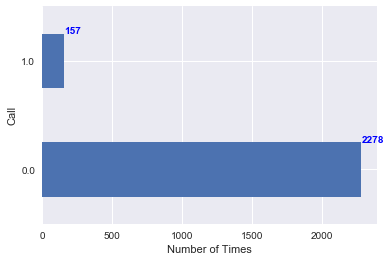

In [102]:
ax = b['call'].plot(kind='hist', bins=15)
ax.set_xlabel("call")


jt = b['call'].value_counts().plot(kind='barh')
jt.set_xlabel("Number of Times")
jt.set_ylabel("Call")

for i, v in enumerate(w['call'].value_counts()):
    j.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')





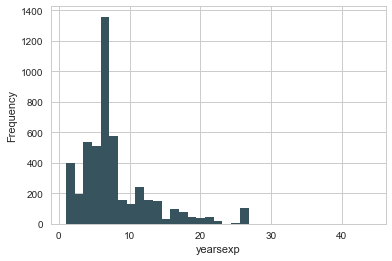

In [44]:
ax = data['yearsexp'].plot(kind='hist', bins=35)
ax.set_xlabel("yearsexp")

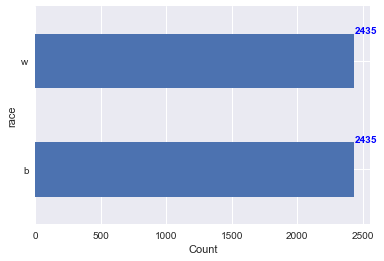

In [106]:
jb = data['race'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("race")

for i, v in enumerate(data['race'].value_counts()):
    jb.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')


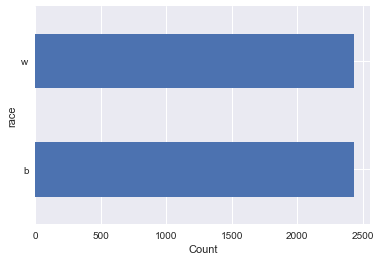

In [73]:
jb = data['race'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("race")

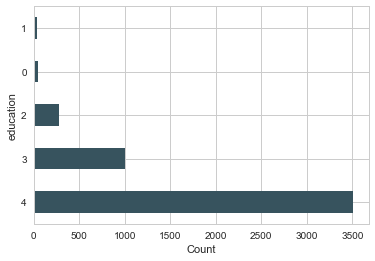

In [45]:


jb = data['education'].value_counts().plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("education")

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

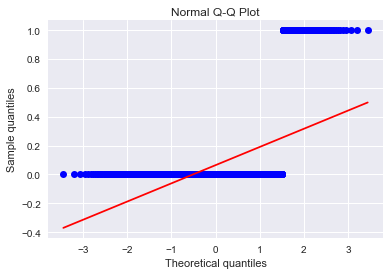

In [39]:
stats.probplot(b['call'], dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

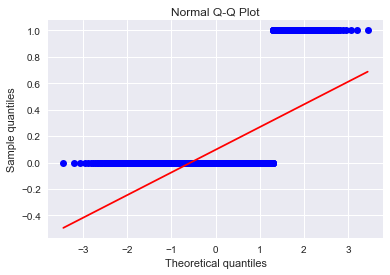

In [40]:
stats.probplot(w['call'], dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

#### Based on the plots above it looks like the data for "call" does not follow the normal distribution but looks more like Binomial distribution ; we can also try to apply the Normality test to confirm the assumption that the data does not follow the Normal Distribution.

#### Here are our Null hypothesis and Alternate hypothesis

##### H0 : Sample follows normal distribution
##### Ha : Sample does not follow normal distribution

In [9]:




excessreadmin = b['call']

shapiro_results = scipy.stats.shapiro(excessreadmin)

print('Shapiro Results'+' P-Value = ' + str(shapiro_results[1]) + '  Test-Statistic  =' + str(shapiro_results[0]))

z,pval = stats.normaltest(excessreadmin)

print('Normal test Results'+' P-Value = ' + str(pval) + '  z  =' + str(z))

Shapiro Results P-Value = 0.0  Test-Statistic  =0.26313191652297974
Normal test Results P-Value = 0.0  z  =1743.15414613


In [10]:
excessreadmin = w['call']

shapiro_results = scipy.stats.shapiro(excessreadmin)

print('Shapiro Results'+' P-Value = ' + str(shapiro_results[1]) + '  Test-Statistic  =' + str(shapiro_results[0]))

z,pval = stats.normaltest(excessreadmin)

print('Normal test Results'+' P-Value = ' + str(pval) + '  z  =' + str(z))

Shapiro Results P-Value = 0.0  Test-Statistic  =0.3352460265159607
Normal test Results P-Value = 4.49197709577e-284  z  =1304.86374694


#### p-value<0.05 , so we reject the null hypothesis and can tell that the Normality Test shows us that the samples do not follow Normal Distribution

#### CLT Does not apply here since we cannot assume that the W['call'] and b['Call'] follows normal distribution 

# Q2. What are the null and alternate hypotheses?

Ho: There is no relationship between call back and race.

H1: There is relationship between call back and race.

# Q3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

### Q3.1 Using Frequentist approach to calculate P-Value,Margin of error and Confidence interval


In [9]:
data['race_num'] = data['race'].map({'b': 1, 'w': 0})

In [10]:
dfObserved = pd.crosstab(data['race_num'],data['call'])

dfObserved

call,0.0,1.0
race_num,,
0,2200,235
1,2278,157



##### Since Race and Call are both Catagorical Variables we cannot have Statistics like Mean and std.deviation and so we cannot use T-Test And so we have to use the Chi-Square test.


In [37]:
# We cannot use the T-Test to check the relationship between race and callback so we cant use 
#stats.ttest_ind(data[data['call']==0.0]['race_num'],data[data['call']==1.0]['race_num'])

#We use Chi-Square Test

chi2,p,dof,expected = stats.chi2_contingency(dfObserved.values)

p

4.9975783899632552e-05

###### Given that the P-Value is < 0.05 We reject the null hypothesis and go with the alternate hypothesis that There is relationship between call back and race



#### Note that we can check using the Bootstrap method if the difference in mean follows a normal distribution or not; if we find that the difference in mean follow the Normal distribution then we can use the T-Test to find the CI and margin of error for the difference in mean

### Using Bootstrap approach to check for Normality for difference in mean

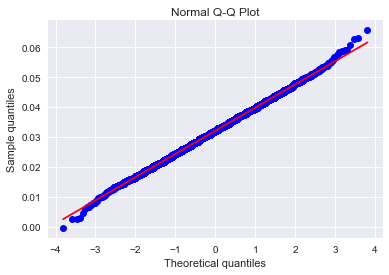

In [12]:
ci_diff,sorted_bootdiff = bootci_diff(w['call'],b['call'],keepboot=True)



stats.probplot(sorted_bootdiff, dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

##### As shown above from the QQ plot we can say that the difference in mean/proportion for each race follows a normal distribution in which CLT can be applied. Two sample t-test is appropriate to use in comparing these two percentages.    



Ho: There is no significant difference between Mean of Black Resumes called back and Mean of White Resumes Called back.

H1: There is significant difference between Mean of Black Resumes called back and Mean of White Resumes Called back.


In [32]:
stats.ttest_ind(b['call'],w['call'],equal_var=False)

Ttest_indResult(statistic=-4.1147052908617514, pvalue=3.9429415136459352e-05)

Pvalue<0.05 so we reject the null hypothesis and go with Alternate hypothesis that There is significant difference between Mean of Black Resumes called back and Mean of White Resumes Called back.

##### To calculate the 95% confidence interval for  Difference of Mean between black and white resumes

##### Note that Mean is Equal to Proportion here since its a Binary response system

Formulae to calculate confidence interval for difference of two proportion is 

absolute(p1-p2) + z * sqrt((p1 (1-p1) /n1) + (p2 (1-p2)/n2))

absolute(p1-p2) - z * sqrt((p1 (1-p1) /n1) + (p2 (1-p2)/n2))

             
Lets use the formaule above with the data that we have to calculate the 95% Confidence Interval.

In [12]:
#Calculating the p1 = Total black called
total_b = (data[data.race=='b'].race).size
total_b_called = sum(data[data.race=='b'].call)

print('total_b_called',total_b_called)
print('total_b',total_b)

#proportion of black called= p1 %
p1 = (total_b_called/total_b)

print('p1 = ',p1)

total_b_called 157.0
total_b 2435
p1 =  0.064476386037


In [13]:
#Calculating the p2 = Total white called
total_w_called = sum(data[data.race=='w'].call)
total_w = (data[data.race=='w'].race).size

print('total_w_called',total_w_called)
print('total_w',total_w)

#proportion of white called= p2 %
p2 = (total_w_called/total_w)

total_w_called 235.0
total_w 2435


#### Note that You can use the normal distribution to calculate sample distribution of sample proportion if the following two formulas are true:
##### np≥5 And n(1-p)≥5


In [14]:
#for race=white
nt1=total_w
pt1_val = p2

ntpt1 = nt1 * pt1_val
ntpt11 = nt1 * (1-pt1_val)

print('ntpt1 = ',ntpt1)
print('ntpt11 = ',ntpt11)

#for race=white
nt2=total_b
pt2_val = p1

ntpt2 = nt2 * pt2_val
ntpt22 = nt2 * (1-pt2_val)

print('ntpt2 = ',ntpt2)
print('ntpt22 = ',ntpt22)

ntpt1 =  235.0
ntpt11 =  2200.0
ntpt2 =  157.0
ntpt22 =  2278.0


#### As we can see above ntpt1 , ntpt2 , ntpt11 and ntpt22 are all > 5 , so we can use the Normal Distribution to calculate the sample  distribution of  sample proportion.

#### For Normal Distribution 95% confidence interval -> Z= 1.96

In [15]:
#z * sqrt((p1 (1-p1) /n1) + (p2 (1-p2)/n2))
z = 1.96
n1 = total_b
n2 = total_w

variance_b = p1*(1-p1)/n1
variance_w = p2*(1-p2)/n2

var_sqrt = np.sqrt(variance_b+variance_w)

standard_error = z * var_sqrt

In [16]:
lower_bound = abs(p1-p2) - standard_error
upper_bound = abs(p1-p2) + standard_error

print('lower bound',lower_bound)
print('upper bound',upper_bound)

lower bound 0.0167774478596
upper bound 0.0472882605593


In [17]:
print('95% Confidence Interval = ',lower_bound,upper_bound)

95% Confidence Interval =  0.0167774478596 0.0472882605593


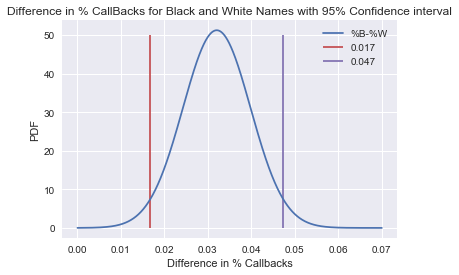

In [19]:
## Normal Distribution of difference in percentage of Black and White Callbacks
x = np.linspace(0,0.07,4870)
y1 = stats.norm.pdf(x, loc=abs(pt1_val-pt2_val), scale=var_sqrt)    
pylab.plot(x,y1)

pylab.xlabel('Difference in % Callbacks')
pylab.ylabel('PDF')
pylab.vlines(lower_bound,0, 50, color='C2')
pylab.vlines(upper_bound,0,50, color='C3')
pylab.legend(['%B-%W', '0.017', '0.047'])
pylab.title('Difference in % CallBacks for Black and White Names with 95% Confidence interval')
pylab.show()

### Q3.2 Using Bootstrap approach to calculate P-Value,Margin of error and Confidence interval



###### Note: Since the values in b['call'] and w['call'] are 0 and 1 , the Proportion will be same as Mean in this case

Ho: There is no significant difference between proportion of black and white resumes.

H1: There is significant difference between proportion of black and white resumes.


In [4]:
p_val = bootpv(b['call'],w['call'])

p_val

Observed difference of two means: -0.03
0 out of 10000 experiments had a difference of two means less than or equal to -0.03
The chance of getting a difference of two means less than or equal to -0.03 is 0.0000


0.0

###### Given that the P-Value is < 0.05 We reject the null hypothesis and go with the alternate hypothesis that there is significant difference between "percentage called back" for black and white resumes.

###### compute the 95% confidence interval of the difference in proportion (mean) between the two sample

In [28]:
ci_diff = bootci_diff(b['call'], w['call'])

bupper_bound,blower_bound = ci_diff



In [34]:
print('95% Confidence Interval = ',abs(blower_bound),abs(bupper_bound))

95% Confidence Interval =  0.0168378 0.0472279



## Q4. Write a story describing the statistical significance in the context or the original problem.

As we can see from the Frequentist as well as Bootstrap tests , there is a definately relationship between the call back rate and the black/white sounding names in otherwords the Race definately affects the likelyhood of some one getting the call for next round of interviews

## Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?



In [35]:
list(b.columns.values)

['id',
 'ad',
 'education',
 'ofjobs',
 'yearsexp',
 'honors',
 'volunteer',
 'military',
 'empholes',
 'occupspecific',
 'occupbroad',
 'workinschool',
 'email',
 'computerskills',
 'specialskills',
 'firstname',
 'sex',
 'race',
 'h',
 'l',
 'call',
 'city',
 'kind',
 'adid',
 'fracblack',
 'fracwhite',
 'lmedhhinc',
 'fracdropout',
 'fraccolp',
 'linc',
 'col',
 'expminreq',
 'schoolreq',
 'eoe',
 'parent_sales',
 'parent_emp',
 'branch_sales',
 'branch_emp',
 'fed',
 'fracblack_empzip',
 'fracwhite_empzip',
 'lmedhhinc_empzip',
 'fracdropout_empzip',
 'fraccolp_empzip',
 'linc_empzip',
 'manager',
 'supervisor',
 'secretary',
 'offsupport',
 'salesrep',
 'retailsales',
 'req',
 'expreq',
 'comreq',
 'educreq',
 'compreq',
 'orgreq',
 'manuf',
 'transcom',
 'bankreal',
 'trade',
 'busservice',
 'othservice',
 'missind',
 'ownership']

-As we an see above there are other very important signals like Sex,Education,yersexp,city,skills that may affect the callback sucess/failure.


-Further Tests need to be conducted to find the statistical significance between different features and callback success to test which other features are most important in callback success/failure.  